MSE  0.018785824


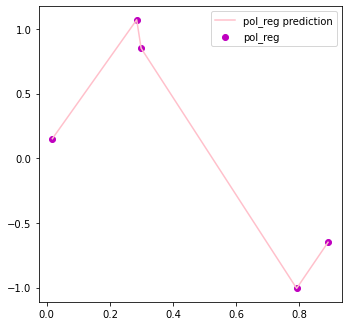

MSE  0.170154283


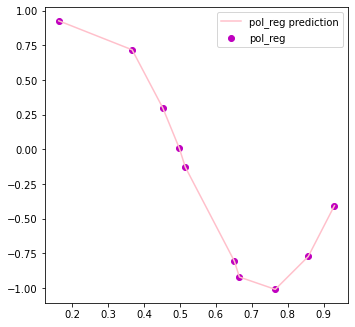

MSE  0.085994691


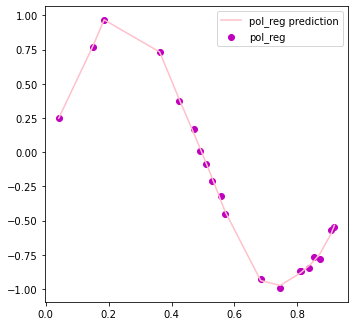

MSE  0.427127641


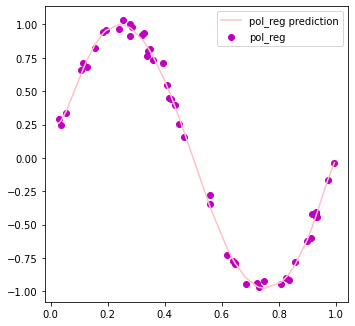

MSE  0.178441322


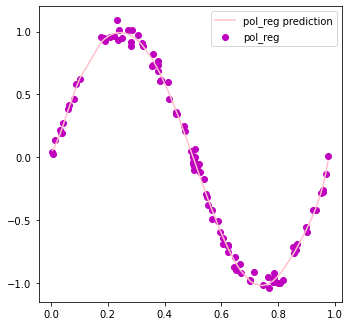

MSE  0.195366256


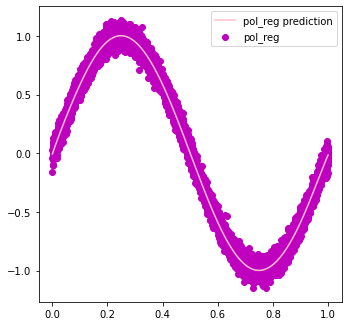

In [4]:
import numpy as np; np.random.seed(48)
import matplotlib.pyplot as plt;
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def groundTruth(x): return np.sin(2*np.pi*x)

sizes= [5,10,20,50,100,10000]

for i,size in enumerate(sizes):
    plt.figure(figsize=(25, 25))
    plt.title("Size: {} ".format(size))
    i += 1
    plt.subplot(4,4,i)
    
    X = np.random.random(size = size)
    
    mu, sigma = 0, 0.05
    s = np.random.normal(mu, sigma, size)
    
    y = s + groundTruth(X)                    # Sin (2 pi x ) + Gaussian (mean 0,  variance 0.05)
    
    X = X[:,np.newaxis]
    y = y[:,np.newaxis]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8)
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    
    poly_reg = PolynomialFeatures(degree = 10)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    yPred = pol_reg.predict(X_poly)
    
    
    plt.scatter(X, y,color='m',label='pol_reg')
    X, yPred = zip(*sorted(zip(X,yPred)))
    plt.plot(X, yPred, color='pink',label='pol_reg prediction')
    plt.legend()  
    
    
    pol_reg_acc = LinearRegression()
    pol_reg_acc.fit(X_train,y_train)
    
    y_predicted = pol_reg_acc.predict(X_test)
    mse = mean_squared_error(y_test,y_predicted)
    print("MSE  %.9f"%(mse))
    plt.show()